starting gradient descent....
m=1.4554176718736282, b=1.0243460898341017, error=112.12837492690956
completed gradient desecent..
starting gradient descent....
m=1.4562343255586683, b=1.0199347041999498, error=112.1176984965634
completed gradient desecent..
starting gradient descent....
m=1.4577570162904117, b=1.0117094599595604, error=112.10488467607478
completed gradient desecent..
starting gradient descent....
m=1.4553491734534671, b=1.0247161034055785, error=112.12939116376506
completed gradient desecent..
starting gradient descent....
m=1.457169773801224, b=1.01488161619668, error=112.10873262294548
completed gradient desecent..
starting gradient descent....
m=1.4558618394600877, b=1.0219467931114443, error=112.12223871259879
completed gradient desecent..
starting gradient descent....
m=1.457833316118769, b=1.0112973048773397, error=112.10448552779519
completed gradient desecent..
starting gradient descent....
m=1.4569285305183821, b=1.0161847599548717, error=112.11071136376695
com

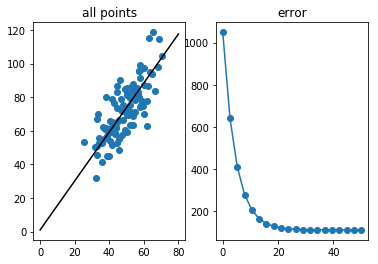

m=1.4568661588674607, b=1.0165216780511128, error=112.11126066002684


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import random

def error(points, m, b):
    # pass
    error_val = 0.0
    for i in range(len(points)):
        x = points[i,0]
        y = points[i,1]
        error_val += (y-(m*x+b))**2
        # print((y-(m*x+b))**2)
    return error_val/float(len(points))


def gradient_runner(points, m_current, b_current, learning_rate):
    dm = 0.0
    db = 0.0
    N = len(points)
    for i in range(N):
        dm += -(points[i,1]-(m_current*points[i,0]+b_current))*points[i,0]
        db += -(points[i,1]-(m_current*points[i,0]+b_current))

    m = m_current - dm*learning_rate/N
    b = b_current - db*learning_rate/N
    # print(m, b)
    return [m,b]

def gradient(points, m, b, learning_rate, num_iter):
    error_list = []
    for i in range(num_iter):
        m, b = gradient_runner(points, m, b, learning_rate)
        error_list.append(error(points, m, b)) 
    # print(m,b)
    return [m,b, error_list]

if __name__=="__main__":
    points = np.genfromtxt("Desktop/data.csv", delimiter=',')
    
    #learning rate is modified from 0.1 to 0.0001 as a factor of 10 upon each iteration i.e, 0.1, 0.01, 0.001, 0.0001....etc
    learning_rate = 0.0001
    num_iter = 20
    
    #picking 10 random m, b values and running gradient descent and storing the best m,b with min error...
    for i in range(10):
        m = random.random()
        b = 1
        # error = 0
        
        old_error = error(points, m, b)
        print("starting gradient descent....")
        m, b, error_list = gradient(points, m, b, learning_rate, num_iter)
        
        diff_errors_on_rand_mb = error(points,m,b)
        print("m={}, b={}, error={}".format(m, b, error(points,m,b)))
        print("completed gradient desecent..")
        
        # storing the m,b with min error and these are used while plotting the graph at last..
        if diff_errors_on_rand_mb > old_error:
            final_m, final_b = m, b
    # two plots
    # 1) scatter plot showing the data 
    plt.subplot(1,2,1)
    plt.title("all points")
    plt.plot(points[:,0], points[:,1],'o')
    
    # the line of best fit..
    plt.plot([0,80],[b, m*80+b], 'k-')
    
    # 2) error values
    x = np.linspace(0, 50, num_iter)
    plt.subplot(1,2,2)
    plt.title("error")
    plt.plot(x, error_list, 'o-')
    plt.show()
    print("m={}, b={}, error={}".format(m, b, error(points,m,b)))